## Deep Neural Networks


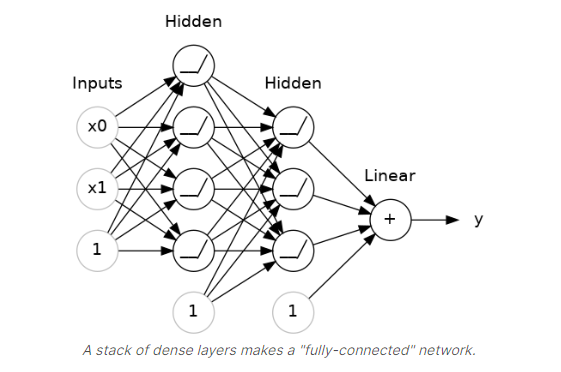

### Ta sẽ sử dụng một mô hình MLP cơ bản để áp dụng cho bài toán dự đoán chất lượng rượu (Wine Quality Regression)


In [ ]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('/content/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [ ]:
print(X_train.shape)


(1119, 11)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='mse',
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=20,
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.1543 - val_loss: 0.0351
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0337 - val_loss: 0.0381
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0294 - val_loss: 0.0293
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0294 - val_loss: 0.0239
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0223 - val_loss: 0.0197
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0200 - val_loss: 0.0185
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0195 - val_loss: 0.0187
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0191 - val_loss: 0.0174
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0188 - val_loss: 0.0178
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0187 - val_loss: 0.0173
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0184 - val_loss: 0.0169
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0189 - val_loss: 0.0176


Text(0.5, 1.0, 'Loss vs. epochs')

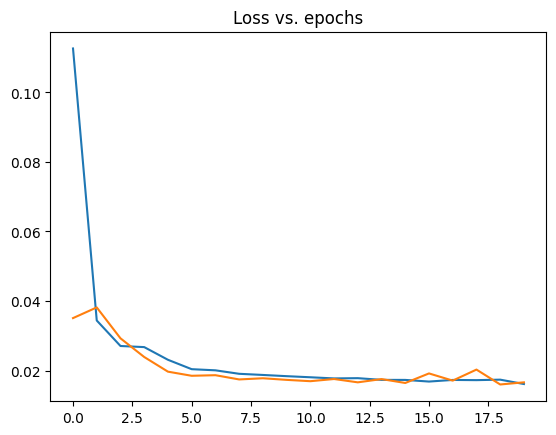

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)

# Plot loss và val_loss

plt.plot(history_df['loss'])
plt.plot(history_df['val_loss'])
plt.title('Loss vs. epochs')

## Overfitting and Underfitting


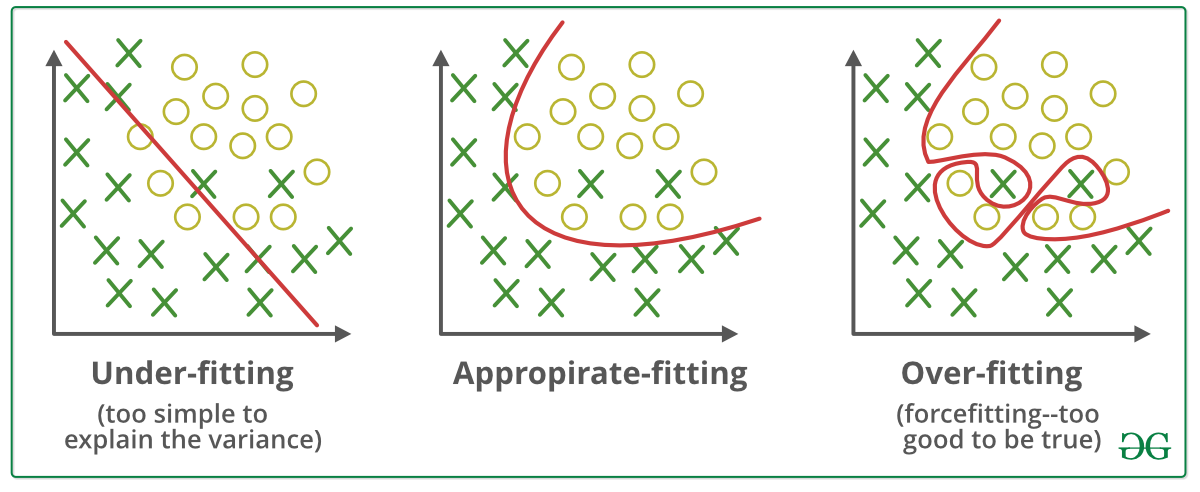



*   Underfitting the training set is when the loss is not as low as it could be because the model hasn't learned enough signal.
*    Overfitting the training set is when the loss is not as low as it could be because the model learned too much noise



Early Stopping


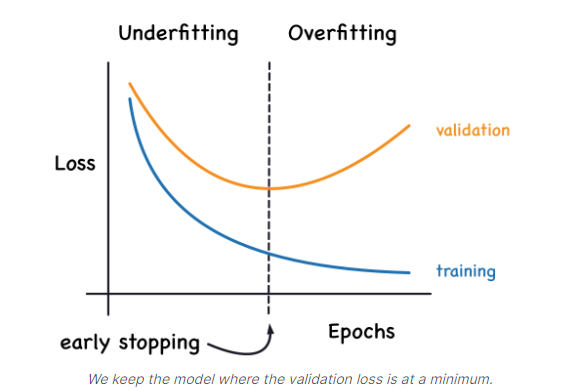

Adding Early Stopping


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Example - Train a Model with Early Stopping

In [ ]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('/content/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mse',
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum validation loss: 0.015667615458369255
Number of epoches: 34


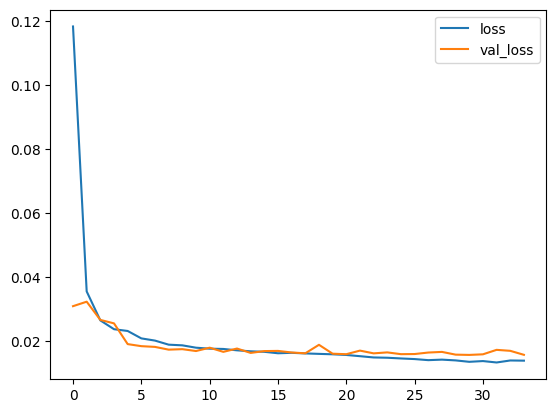

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
print("Number of epoches: {}".format(len(history_df['val_loss'])))

## Dropout and Batch Normalization


**Dropout**

Dropout với hệ số p nghĩa là trong quá trình train model, với mỗi lần thực hiện cập nhật hệ số trong gradient descent ta ngẫu nhiên loại bỏ p% số lượng node trong layer đấy, hay nói cách khác là dữ lại (1-p%) node. Mỗi layer có thể có các hệ số dropout p khác nhau.

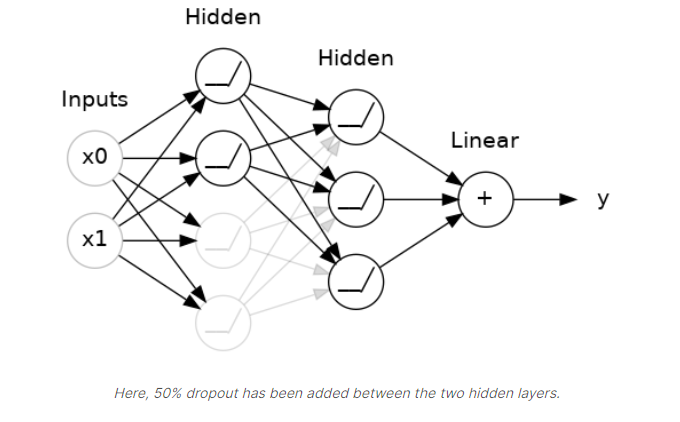

Adding Dropout


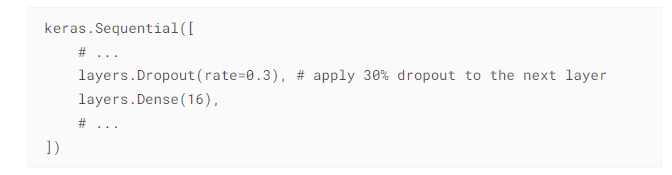

**Batch Normalization**

Batch normalization thực hiện việc chuẩn hóa (normalizing) và zero centering (mean substracting)
dữ liệu trước khi đưa qua hàm activation (giá trị trung bình (mean) sẽ được đưa về 0 và phương sai
(variance) sẽ được đưa về 1)



Ngoài ra hiện tại còn có các phương pháp khác tốt hơn và được ứng dụng trong các mô hình lớn như Large Language Model đó là **Layer Normalization** vượt trội hơn so với **Batch Normalization**

**Adding** Batch Normalization






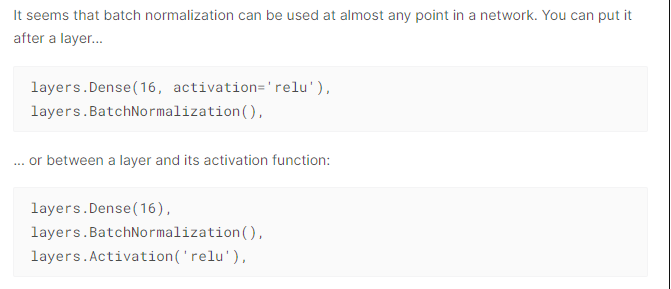

Các phương pháp trên giúp giải quyết các vấn đề như vanishing gradient hay exploding gradient.

Example - Using Dropout and Batch Normalization


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


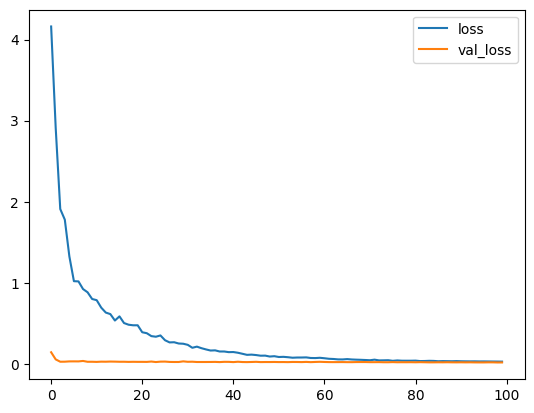

In [ ]:
model.compile(
    optimizer='adam',
    loss='mse',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

## Binary Classification


Binary Cross-Entropy Loss


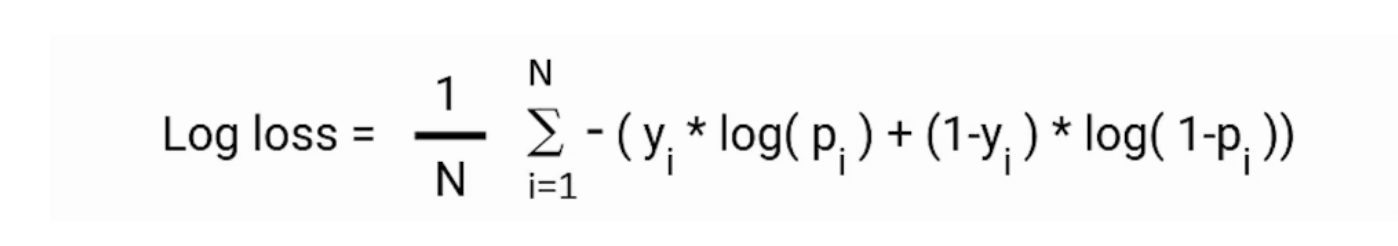

Cross-Entropy Loss

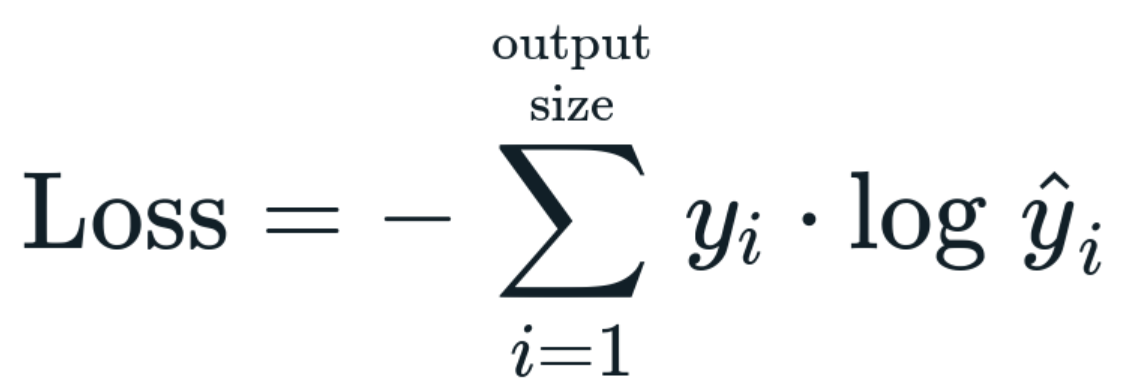

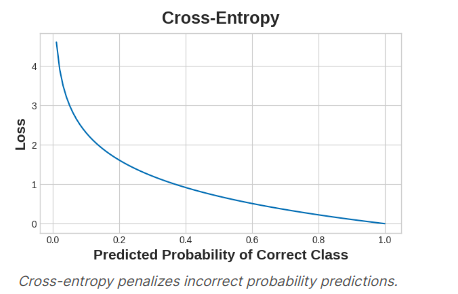

Sigmoid Activation

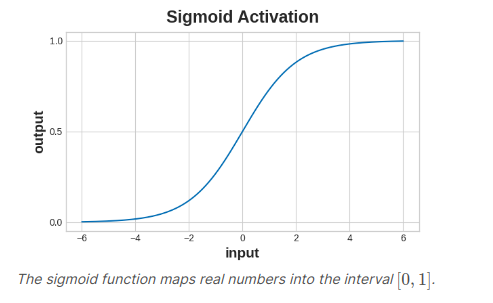

## Use a neural network to predict cancellations in hotel reservations with the Hotel Cancellations dataset.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('/content/hotel.csv')

hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

1. Define Model


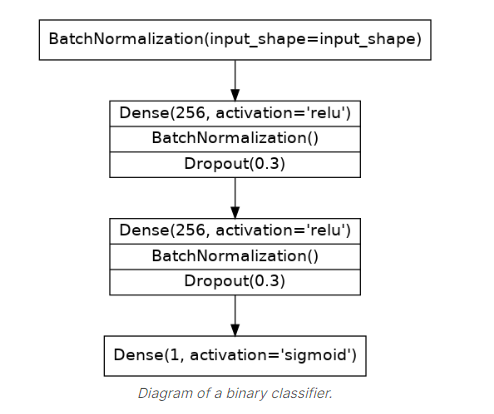

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model =keras.Sequential([
    layers.BatchNormalization(input_shape = input_shape),
    layers.Dense(256, activation = "relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation = "relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation ="sigmoid")
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2. Add Optimizer, Loss, and Metric


In [ ]:
model.compile(
optimizer = "Adam",
loss = "binary_crossentropy",
metrics = ["binary_accuracy"],
)


In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)



Epoch 1/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - binary_accuracy: 0.7338 - loss: 0.5425 - val_binary_accuracy: 0.8011 - val_loss: 0.4316
Epoch 2/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - binary_accuracy: 0.7992 - loss: 0.4255 - val_binary_accuracy: 0.8200 - val_loss: 0.3974
Epoch 3/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - binary_accuracy: 0.8039 - loss: 0.4151 - val_binary_accuracy: 0.8232 - val_loss: 0.3884
Epoch 4/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - binary_accuracy: 0.8101 - loss: 0.4046 - val_binary_accuracy: 0.8229 - val_loss: 0.3879
Epoch 5/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - binary_accuracy: 0.8128 - loss: 0.4007 - val_binary_accuracy: 0.8264 - val_loss: 0.3819
Epoch 6/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - binary_accuracy: 0.8159 - loss: 0.3959 - val_binary_accuracy: 0.8254 - val_loss: 0.3804
Epoch 7/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - binary_accuracy: 0.8216 - loss: 0.3876 - val_binary_accuracy: 0.8301 - val_loss:

<Axes: title={'center': 'Accuracy'}>

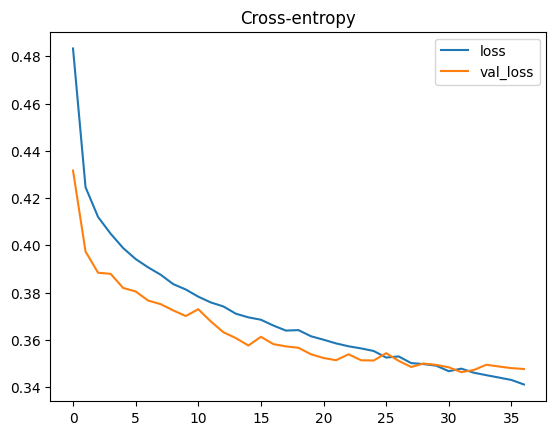

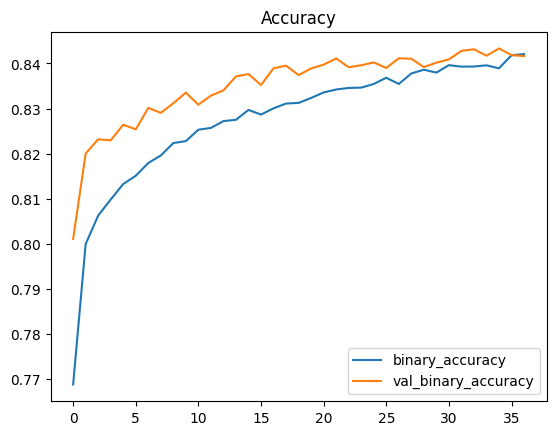

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [ ]:
Y_new = model.predict(X_valid)

933/933 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


### Another version using Pytorch

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import torch
from torch import Tensor
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)


X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]
print("Input shape:", input_shape)

Input shape: [63]


In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, n_feat, n_class):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(n_feat, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, n_class)
        self.bn0 = nn.BatchNorm1d(n_feat)
        self.bn1 = nn.BatchNorm1d(256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout = nn.Dropout(0.3)

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.optimizer = optim.Adam(params=self.parameters(), lr=0.001)
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, feat):
        f = self.bn0(feat)
        f = F.relu(self.fc1(f))
        f = self.bn1(f)
        f = self.dropout(f)
        f = F.relu(self.fc2(f))
        f = self.bn2(f)
        f = self.dropout(f)
        f = self.fc3(f)
        return F.softmax(f, dim=1)

    def save(self, path):
        torch.save(self.state_dict(), path)

    def load(self, path):
        self.load_state_dict(torch.load(path))

In [ ]:
def train(model_av, model_path, X_train, y_train, n_epochs):
    model = NeuralNet(n_feat=63, n_class=2)
    model.train()
    model.to(model.device)
    if model_av:
        model.load(model_path)

    dt = TensorDataset(torch.Tensor(X_train.tolist()), torch.LongTensor(list(y_train)))
    dt = DataLoader(dt, batch_size=512, shuffle=True)

    for epoch in (range(n_epochs)):
        pred_v, class_v, loss_v = [], [], []
        for bfeat, bclass in dt:
            bfeat, bclass = bfeat.to(model.device), bclass.to(model.device)
            bpred = model(bfeat)

            loss = model.criterion(bpred, bclass)
            model.optimizer.zero_grad()
            loss.backward()
            model.optimizer.step()

            _, bpred = torch.max(bpred.data, 1)
            pred_v.extend(bpred.tolist())
            class_v.extend(bclass.tolist())
            loss_v.append(loss.item())

        if epoch % 5 == 0:
            model.save(f"/content/model/model_{str(epoch).zfill(2)}.pt")

        print(f"____________Epoch {epoch}:")
        print(f"Accuracy: {accuracy_score(pred_v, class_v)}")
        print(f"Loss: {sum(loss_v) / len(loss_v)}")

In [ ]:
import torch
from sklearn.metrics import accuracy_score, classification_report

def test(model_av, X_test, y_test):
    model = NeuralNet(n_feat=63, n_class=2)
    model.to(model.device)
    if model_av:
        model.load("/content/model15")

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        X_test_tensor = torch.FloatTensor(X_test).to(model.device)
        y_test_tensor = torch.LongTensor(y_test.tolist()).to(model.device)  # Assuming y_test is a 1D array of class indices

        X_test_tensor, y_test_tensor = X_test_tensor.to(model.device), y_test_tensor.to(model.device)
        # Forward pass
        output = model(X_test_tensor)

        # Get the predicted class indices
        _, predicted = torch.max(output, 1)

        # Calculate accuracy
        accuracy = accuracy_score(predicted.tolist(), y_test.tolist())
        print(f'Test Accuracy: {accuracy:.4f}')

        # Generate classification report
        report = classification_report(y_test.tolist(), predicted.tolist())
        print(f'Classification Report:\n{report}')

In [ ]:
train(model_av=False, model_path="", X_train=X_train, y_train=y_train, n_epochs=20)

____________Epoch 0:
Accuracy: 0.7932143575082085
Loss: 0.5105047450746809
____________Epoch 1:
Accuracy: 0.8097317459962923
Loss: 0.4958667499678476
____________Epoch 2:
Accuracy: 0.8137187018382435
Loss: 0.4919912539209638
____________Epoch 3:
Accuracy: 0.8161868173594514
Loss: 0.4893575017792838
____________Epoch 4:
Accuracy: 0.8182640548569386
Loss: 0.48755890386445183
____________Epoch 5:
Accuracy: 0.8203301244108909
Loss: 0.48598684685570853
____________Epoch 6:
Accuracy: 0.821603269973867
Loss: 0.48415627428463526
____________Epoch 7:
Accuracy: 0.8243952558575863
Loss: 0.48233364820480346
____________Epoch 8:
Accuracy: 0.8244845994058654
Loss: 0.48164790408951896
____________Epoch 9:
Accuracy: 0.8269415469835385
Loss: 0.479582941702434
____________Epoch 10:
Accuracy: 0.8284938911348865
Loss: 0.47882761784962247
____________Epoch 11:
Accuracy: 0.8293873266176767
Loss: 0.4773948727335249
____________Epoch 12:
Accuracy: 0.8297000290366532
Loss: 0.4766526324408395
____________Epoch 

In [ ]:
test(model_av=True, X_test=X_valid, y_test=y_valid)

Test Accuracy: 0.8371
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     18792
           1       0.82      0.72      0.77     11056

    accuracy                           0.84     29848
   macro avg       0.83      0.81      0.82     29848
weighted avg       0.84      0.84      0.83     29848



Nguồn để học các mô hình sử dụng base là MLP:
1.   Word2Vec: https://www.youtube.com/watch?v=viZrOnJclY0&t=767s
2.   RNN: https://www.youtube.com/watch?v=AsNTP8Kwu80&t=377s
3.   LSTM: https://www.youtube.com/watch?v=YCzL96nL7j0
4.   Transformers: https://www.youtube.com/watch?v=zxQyTK8quyY&t=1814s




